### Experiments

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [158]:
df=pd.read_csv('aug_train.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0


In [159]:
df=df[:25000]

In [160]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,419804,Male,25,1,15.0,1,< 1 Year,No,30389.0,152.0,172,0
24996,322697,Male,74,1,28.0,1,1-2 Year,No,48849.0,122.0,188,0
24997,330176,Female,41,1,28.0,0,1-2 Year,Yes,38198.0,26.0,277,1
24998,479848,Female,37,1,28.0,0,1-2 Year,Yes,38501.0,122.0,26,1


In [161]:
df['Response'].value_counts()

0    20914
1     4086
Name: Response, dtype: int64

<AxesSubplot:ylabel='Response'>

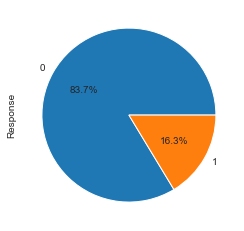

In [162]:
df['Response'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [163]:
df=df.drop(columns='id',axis=1)

In [164]:
X=df.drop(columns='Response',axis=1)
y=df.Response

In [165]:
X_num=X.select_dtypes(include='number')
X_cat=X.select_dtypes(include='object')

ss=MinMaxScaler()
X_num_scaled=ss.fit_transform(X_num)
X_num_scaled=pd.DataFrame(X_num_scaled,columns=X_num.columns,index=X_num.index)

X_cat_encoded=pd.get_dummies(X_cat,drop_first=False,dtype=int)

X=pd.concat([X_num_scaled,X_cat_encoded],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18750, 14)
(6250, 14)
(18750,)
(6250,)


### Resampling after train_test

### Impact of Imbalance

<AxesSubplot:ylabel='Response'>

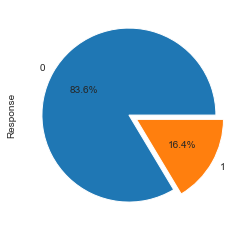

In [166]:
y_train.value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.1])

## Experiment 1

#### Objective: This experiment aims to find the effect of Imbalanced dataset on evaluation metrics.

#### When a dataset is imbalanced, it is tend to cause issues within bias and variance. Bias may lead to low recall, variance may lead to low precision. To address these issues we will try and fit a model on our imbalanced dataset

#### Herein we will train model on tree-based ensemble algorithms vs classic ML algorithms like KNN, Logistic 

#### Scoring would be F1 because keeping it particularly Precision or Recall would be unfair with minority/majority class hence we go for F1 which will punish both of them equally

#### Random Forest Classifier

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
forest_params = [{'max_depth': list(range(2, 10))}]

In [169]:
rf=RandomForestClassifier()

In [170]:
clf=GridSearchCV(rf,forest_params,scoring='f1')

In [171]:
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}],
             scoring='f1')

In [172]:
print(clf.best_params_)

{'max_depth': 9}


In [173]:
rfc=RandomForestClassifier(max_depth=9)

In [174]:
model_rfc=rfc.fit(X_train,y_train)

In [175]:
yhat_train=model_rfc.predict(X_train)

In [176]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [177]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     15675
           1       0.86      0.09      0.17      3075

    accuracy                           0.85     18750
   macro avg       0.85      0.54      0.54     18750
weighted avg       0.85      0.85      0.79     18750



### Classification report of test data

In [178]:
yhat_test=model_rfc.predict(X_test)

In [179]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      5239
           1       0.64      0.06      0.10      1011

    accuracy                           0.84      6250
   macro avg       0.74      0.53      0.51      6250
weighted avg       0.81      0.84      0.78      6250



#### As mentioned above, because of the data being imbalanced we are seeing high Bias model i.e., recall score = 0.10.
#### We will check the same for Logistic Regression and trynna find whether its giving somewhat same output or different

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
lr=LogisticRegression()

In [182]:
model_lr=lr.fit(X_train,y_train)

In [183]:
yhat_train_lr=model_lr.predict(X_train)

In [184]:
print(classification_report(y_train,yhat_train_lr))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     15675
           1       0.47      0.11      0.18      3075

    accuracy                           0.83     18750
   macro avg       0.66      0.54      0.54     18750
weighted avg       0.79      0.83      0.79     18750



### Classification report of test data

In [185]:
yhat_test_lr=model_lr.predict(X_test)

In [186]:
print(classification_report(y_test,yhat_test_lr))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      5239
           1       0.54      0.13      0.21      1011

    accuracy                           0.84      6250
   macro avg       0.70      0.55      0.56      6250
weighted avg       0.80      0.84      0.80      6250



#### Again we are seeing low recall (High bias) model.

## Experiment 1 can be concluded by stating that Imbalanced data does affect the model performance wherein it punishes only the minority class, leading to Low recall

## Experiment 2

### Objective: This experiment aims to find out the indicators of imbalanced dataset. The approach to this experiment will be simply comparing the results of experiment 1 vs the results after using smote on the dataset.

In [187]:
from imblearn.over_sampling import SMOTE

In [188]:
sm=SMOTE()

In [189]:
X_train_res,y_train_res=sm.fit_resample(X_train,y_train)

In [190]:
print(X_train.shape)
print(X_train_res.shape)

(18750, 14)
(31350, 14)


In [191]:
print(y_train.shape)
print(y_train_res.shape)

(18750,)
(31350,)


In [192]:
clf.fit(X_train_res,y_train_res)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}],
             scoring='f1')

In [193]:
print(clf.best_params_)

{'max_depth': 9}


### Random Forest after SMOTE

In [194]:
rfc_res=RandomForestClassifier(max_depth=9)

In [195]:
model_res_rfc=rfc_res.fit(X_train_res,y_train_res)

In [196]:
yhat_train_rfc_res=model_res_rfc.predict(X_train_res)

In [197]:
print(classification_report(y_train_res,yhat_train_rfc_res))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     15675
           1       0.80      0.97      0.88     15675

    accuracy                           0.87     31350
   macro avg       0.88      0.87      0.87     31350
weighted avg       0.88      0.87      0.87     31350



In [200]:
yhat_test_res_rfc=model_res_rfc.predict(X_test)

In [202]:
print(classification_report(y_test,yhat_test_res_rfc))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      5239
           1       0.41      0.91      0.56      1011

    accuracy                           0.77      6250
   macro avg       0.69      0.83      0.71      6250
weighted avg       0.88      0.77      0.80      6250



### Logistic Regression after SMOTE

In [203]:
lr_res=LogisticRegression(class_weight='balanced')

In [204]:
model_res_lr=lr_res.fit(X_train_res,y_train_res)

In [205]:
yhat_train_lr_res=model_res_lr.predict(X_train_res)

In [206]:
print(classification_report(y_train_res,yhat_train_lr_res))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78     15675
           1       0.74      0.97      0.84     15675

    accuracy                           0.81     31350
   macro avg       0.85      0.81      0.81     31350
weighted avg       0.85      0.81      0.81     31350



In [207]:
yhat_test_lr_res=model_res_lr.predict(X_test)

In [208]:
print(classification_report(y_test,yhat_test_lr_res))

              precision    recall  f1-score   support

           0       0.99      0.65      0.79      5239
           1       0.35      0.96      0.51      1011

    accuracy                           0.70      6250
   macro avg       0.67      0.81      0.65      6250
weighted avg       0.89      0.70      0.74      6250



### Observation: As seen from both the classification reports, recall has drastically increased for the minority class.

## Experiment 3

### Objective: To compare the results of SMOTE after train_test split versus the results of SMOTE before train_test split

### Resampling before train_test

In [209]:
df2=df.copy()

In [210]:
df2

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...
24995,Male,25,1,15.0,1,< 1 Year,No,30389.0,152.0,172,0
24996,Male,74,1,28.0,1,1-2 Year,No,48849.0,122.0,188,0
24997,Female,41,1,28.0,0,1-2 Year,Yes,38198.0,26.0,277,1
24998,Female,37,1,28.0,0,1-2 Year,Yes,38501.0,122.0,26,1


In [211]:
X2=df2.drop(columns='Response',axis=1)
y2=df2.Response

In [212]:
X2_num=X2.select_dtypes(include='number')
X2_cat=X2.select_dtypes(include='object')

ss=MinMaxScaler()
X2_num_scaled=ss.fit_transform(X2_num)
X2_num_scaled=pd.DataFrame(X2_num_scaled,columns=X2_num.columns,index=X2_num.index)

X2_cat_encoded=pd.get_dummies(X2_cat,drop_first=False,dtype=int)

X2=pd.concat([X2_num_scaled,X2_cat_encoded],axis=1)

In [213]:
sm=SMOTE()

In [214]:
X2_sm,y2_sm=sm.fit_resample(X2,y2)

In [215]:
print(X2.shape)
print(X2_sm.shape)

(25000, 14)
(41828, 14)


In [216]:
print(y2.shape)
print(y2_sm.shape)

(25000,)
(41828,)


In [217]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2_sm,y2_sm,test_size=0.25,random_state=0)

print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(31371, 14)
(10457, 14)
(31371,)
(10457,)


### Random Forest Classifier

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
forest_params = [{'max_depth': list(range(2, 10))}]

In [220]:
rf=RandomForestClassifier()

In [221]:
clf=GridSearchCV(rf,forest_params,scoring='f1')

In [222]:
clf.fit(X2_train,y2_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}],
             scoring='f1')

In [223]:
print(clf.best_params_)

{'max_depth': 9}


In [224]:
rfc=RandomForestClassifier(max_depth=9)

In [225]:
model_rfc=rfc.fit(X2_train,y2_train)

In [226]:
yhat_train=model_rfc.predict(X2_train)

In [227]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [228]:
print(classification_report(y2_train,yhat_train))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85     15701
           1       0.80      0.97      0.88     15670

    accuracy                           0.86     31371
   macro avg       0.88      0.86      0.86     31371
weighted avg       0.88      0.86      0.86     31371



### Classification report of test data

In [229]:
y2hat_test=model_rfc.predict(X2_test)

In [230]:
print(classification_report(y2_test,y2hat_test))

              precision    recall  f1-score   support

           0       0.96      0.76      0.84      5213
           1       0.80      0.96      0.87      5244

    accuracy                           0.86     10457
   macro avg       0.88      0.86      0.86     10457
weighted avg       0.88      0.86      0.86     10457



### Logistic Regression

In [231]:
lr2=LogisticRegression()

In [232]:
model2_lr=lr2.fit(X2_train,y2_train)

In [233]:
y2hat_train_lr=model2_lr.predict(X2_train)

In [234]:
print(classification_report(y2_train,y2hat_train_lr))

              precision    recall  f1-score   support

           0       0.94      0.66      0.78     15701
           1       0.74      0.96      0.83     15670

    accuracy                           0.81     31371
   macro avg       0.84      0.81      0.80     31371
weighted avg       0.84      0.81      0.80     31371



In [235]:
y2hat_test_lr=model2_lr.predict(X2_test)

In [236]:
print(classification_report(y2_test,y2hat_test_lr))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78      5213
           1       0.74      0.96      0.84      5244

    accuracy                           0.81     10457
   macro avg       0.84      0.81      0.81     10457
weighted avg       0.84      0.81      0.81     10457

